In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('adult.csv')

In [48]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [49]:
df.shape

(48842, 15)

In [50]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [57]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [70]:
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [56]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [52]:
df['gender_binary'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [53]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_binary,gender_binary
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282,0.668482
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649,0.470764
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


In [54]:
df_num = df.select_dtypes(int)

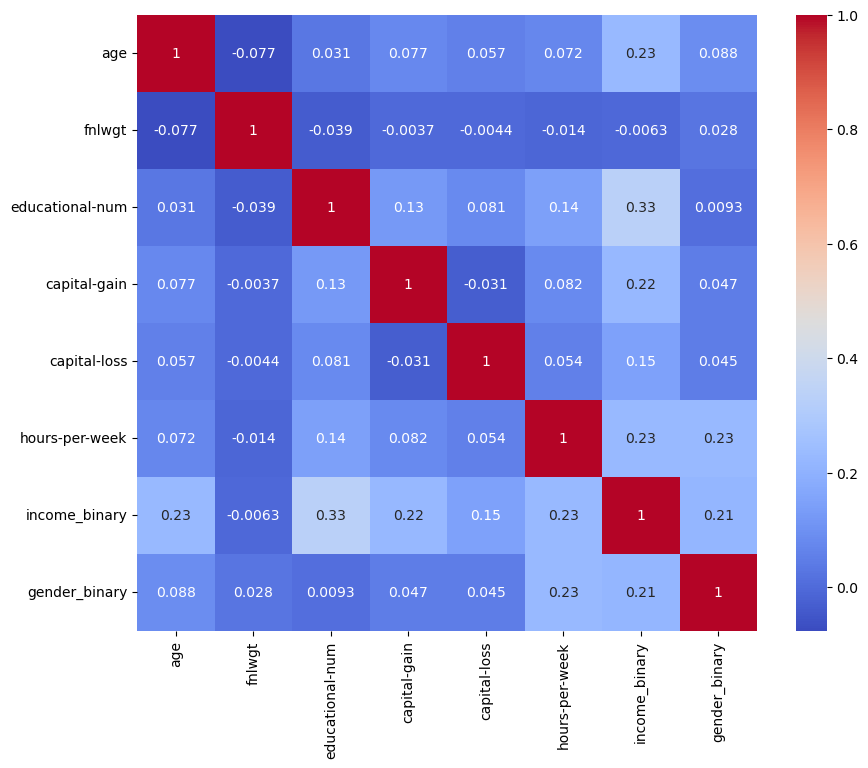

In [55]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm') 
plt.show()

The three relationships I'd like to investigate are income vs race, income vs gender, and income vs educational level. I would hypothesize that different races will have different income distributions, income may vart between male and female, and educational level will dramatically impact income level distribution based on the strong correlation shown. 

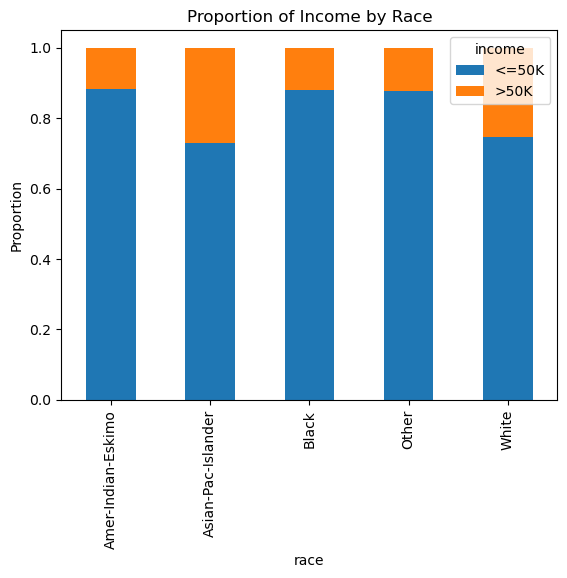

In [73]:
race_income_ct = pd.crosstab(df['race'], df['income'], normalize='index')
race_income_ct.plot(kind='bar', stacked=True)
plt.title('Proportion of Income by Race')
plt.ylabel('Proportion')
plt.show()

It looks like there is some wide variation between races with whites and asian-pac islanders having similar income distribution of earners above and below the 50k mark

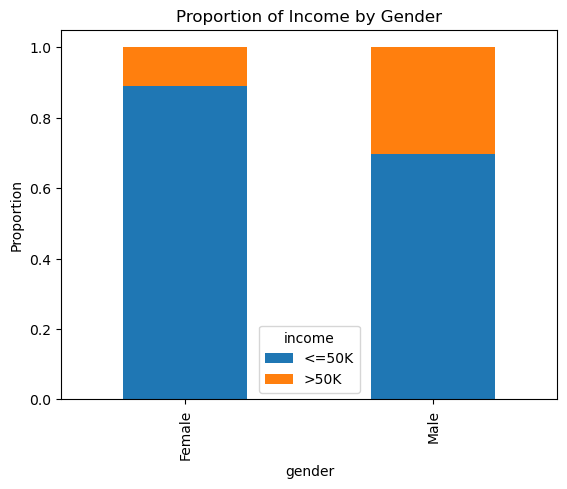

In [74]:
race_income_ct = pd.crosstab(df['gender'], df['income'], normalize='index')
race_income_ct.plot(kind='bar', stacked=True)
plt.title('Proportion of Income by Gender')
plt.ylabel('Proportion')
plt.show()

It looks like males tend earn higher wages than females on average. This would be an interesting trend to explore further. 

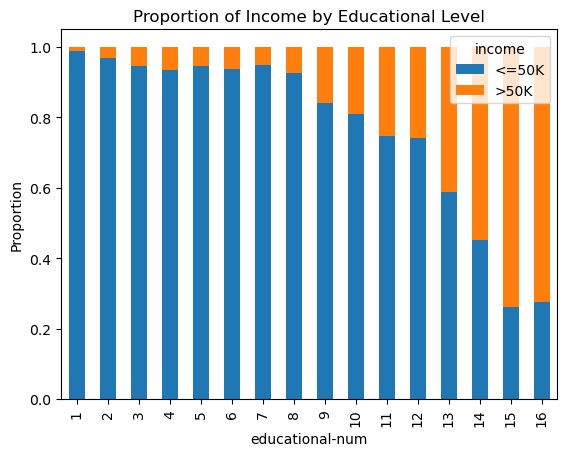

In [75]:
race_income_ct = pd.crosstab(df['educational-num'], df['income'], normalize='index')
race_income_ct.plot(kind='bar', stacked=True)
plt.title('Proportion of Income by Educational Level')
plt.ylabel('Proportion')
plt.show()

This chart shows that people with higher levels of education tend to have a higher income

Further notes, it would be nice to have some continuous income data so that we could view wealth inequality not just split at the 50k mark, but how it is distributed within a given category